<a href="https://colab.research.google.com/github/Divya-620/HD/blob/main/Lays_prediction_or_Not_Using_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python

In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

In [3]:
def load_images(folder_path, size=(128,128)):
    images = []

    for file in os.listdir(folder_path):
        path = os.path.join(folder_path, file)
        img = cv2.imread(path)

        if img is None:
            continue

        img = cv2.resize(img, size)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img / 255.0
        images.append(img)

    return np.array(images)

In [4]:
!unzip /content/lays.v1i.coco.zip

Archive:  /content/lays.v1i.coco.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
   creating: test/
 extracting: test/Flexible-chips-bagspouches-scaled_webp.rf.b9457b6483687487a99c14ee6308747d.jpg  
 extracting: test/M5qY66Duf1yKyMXsUXiTfg_jpg.rf.848e0828d2bbb9210d22af94ec9e4f6d.jpg  
  inflating: test/_annotations.coco.json  
 extracting: test/d33cf0b9-4fa7-4ed5-9d11-53aab53fde17_webp.rf.806640c29a3a26c1e4f0165d2a4fb210.jpg  
 extracting: test/fs4_webp.rf.1a531e7d632c0016332736abff5852ec.jpg  
 extracting: test/i6_jpeg.rf.ce8de4eab1cb3ea497e0c66eb8881f85.jpg  
   creating: train/
 extracting: train/-138073807_jpg.rf.e711dc96c19fc3f5742d0a27569e9888.jpg  
 extracting: train/-27686284_jpg.rf.6513b27166d536014c909b7ba9b9ffc4.jpg  
 extracting: train/-311694817_jpg.rf.4da33f0e8f8d3e3e54bb50709e2ab80c.jpg  
 extracting: train/-Lay-s-_jpg.rf.bac4062f099a7383ef171f706ae48147.jpg  
 extracting: train/-lays-frito-lay-159484698_jpg.rf.a472df2193f67647079a53ff4e17

In [5]:
train_path = "/content/train"
X_train = load_images(train_path)

print("Training shape:", X_train.shape)


Training shape: (80, 128, 128, 3)


In [6]:
input_img = Input(shape=(128,128,3))

# Encoder
x = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

# Decoder
x = Conv2D(64, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(3, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='mse')

autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,651 (295.51 KB)

 Trainable params: 75,651 (295.51 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
autoencoder.fit( X_train, X_train, epochs=30, batch_size=8, shuffle=True)


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 642ms/step - loss: 0.0764
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 752ms/step - loss: 0.0597
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 822ms/step - loss: 0.0439
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 494ms/step - loss: 0.0383
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 545ms/step - loss: 0.0315
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 544ms/step - loss: 0.0323
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 495ms/step - loss: 0.0250
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 633ms/step - loss: 0.0236
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 500ms/step - loss: 0.0228
Epoch 10/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 584ms/step - loss: 0.0213
Epoch 11/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 489ms/step - loss: 0.0201
Epoch 12/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 619ms/step - loss: 0.0197
Epoch 13/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 583ms/step - loss: 0.0196
Epoch 14/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 518ms/step - loss: 0.0206
Epoch 15/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 498ms/step -

In [8]:
def predict_image(image_path, threshold=0.02):

    img = cv2.imread(image_path)
    img = cv2.resize(img, (128,128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    reconstruction = autoencoder.predict(img)

    error = np.mean((img - reconstruction) ** 2)

    print("Reconstruction Error:", error)

    if error < threshold:
        print("✅ This is Lays")
    else:
        print("❌ This is NOT Lays")

    plt.imshow(img[0])
    plt.axis("off")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
Reconstruction Error: 0.024890398991360158
❌ This is NOT Lays


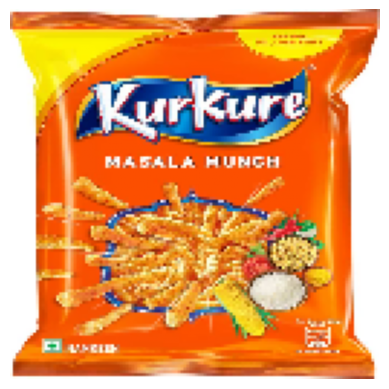

In [9]:
predict_image("/content/71sOPzrW0mL._AC_UF894,1000_QL80_.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Reconstruction Error: 0.030229388385899846
❌ This is NOT Lays


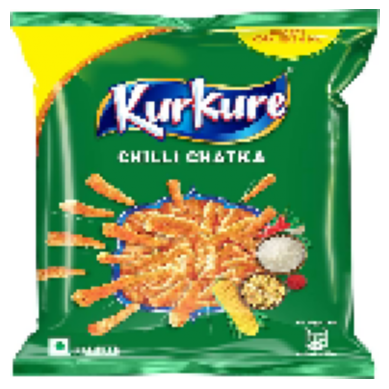

In [13]:
predict_image("/content/71GN9iowhxL._AC_UF894,1000_QL80_.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Reconstruction Error: 0.01483579037620507
✅ This is Lays


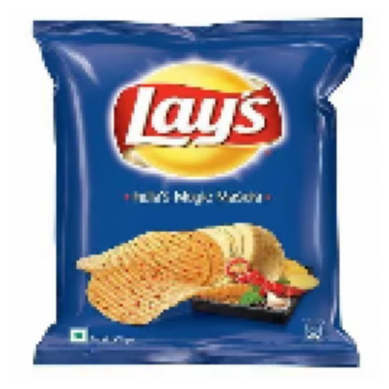

In [10]:
predict_image("/content/india-magic-masala-lays-potato-chips-2217349752-thwepemd.avif")